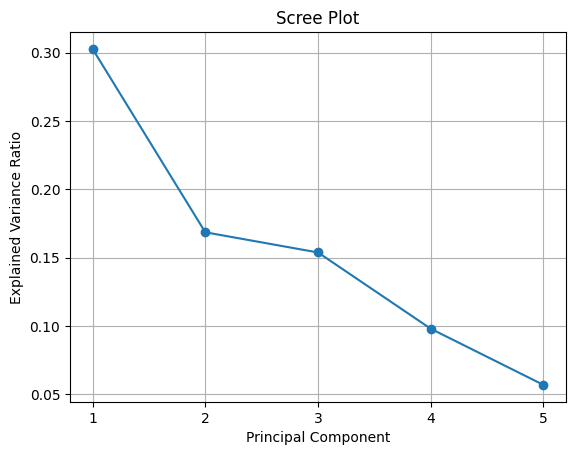

Loadings for Principal Components:
       Open      High       Low     Close    Volume    SENSEX       SPX  \
0 -0.365573 -0.365363 -0.366086 -0.365619  0.294705 -0.000736  0.000347   
1 -0.136524 -0.139265 -0.136576 -0.139925  0.045846 -0.139419 -0.049945   
2  0.034508  0.029414  0.026538  0.020803  0.005290 -0.518151 -0.236450   
3 -0.178567 -0.176298 -0.178511 -0.176779 -0.083138  0.045232  0.021101   
4  0.006114  0.005913  0.003510  0.004001 -0.010362 -0.068834  0.489914   

    USD_INR   GBP_INR  NIFTY_BANK  ...     NFYt2     NFYt3     NFYt4  \
0  0.000557 -0.219596   -0.003924  ... -0.004649 -0.005384 -0.005372   
1 -0.062307 -0.224789   -0.137004  ... -0.010832 -0.022390 -0.012761   
2 -0.302283  0.024393   -0.494772  ...  0.042864 -0.025115  0.004731   
3 -0.018585 -0.428469    0.047363  ... -0.075335 -0.060856 -0.075388   
4 -0.066375  0.021895   -0.111517  ... -0.401431  0.589956 -0.471502   

       T-91     T-182     T-364      FBIL       TE1       TE2       TE3  
0 -0.25

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_excel('dataM23.xlsx')

# Step 2: Data Preprocessing
# Drop columns that are not needed for PCA
df.drop(columns=['Adj Close'], inplace=True)

# Handle missing values if any
df.dropna(inplace=True)

# Extract the date column and drop it from the dataframe
date_column = df['Date']
df.drop(columns=['Date'], inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Perform PCA with 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_scaled)

# Step 4: Create a new DataFrame with PCA components and date column
columns = ['Date', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']
data = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])
data['Date'] = date_column

# Step 5: Save the new DataFrame to a new Excel file
data.to_excel('pca_result.xlsx', index=False)


#  Plot the explained variance ratio (Scree Plot)
plt.figure()
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

# Step 6: Interpretation of Principal Components
# Get the loadings (coefficients) of each original feature for each principal component
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, columns=df.columns)

# Display the loadings for each principal component
print("Loadings for Principal Components:")
print(loadings_df)

# Identify the features with the highest absolute loadings for each principal component
top_features = []
for i in range(len(loadings)):
    top_feature_idx = loadings_df.iloc[i].abs().argsort()[-3:][::-1]  
    top_features.append(df.columns[top_feature_idx].values)
    print(f"Top features for PCA{i+1}: {top_features[i]}")


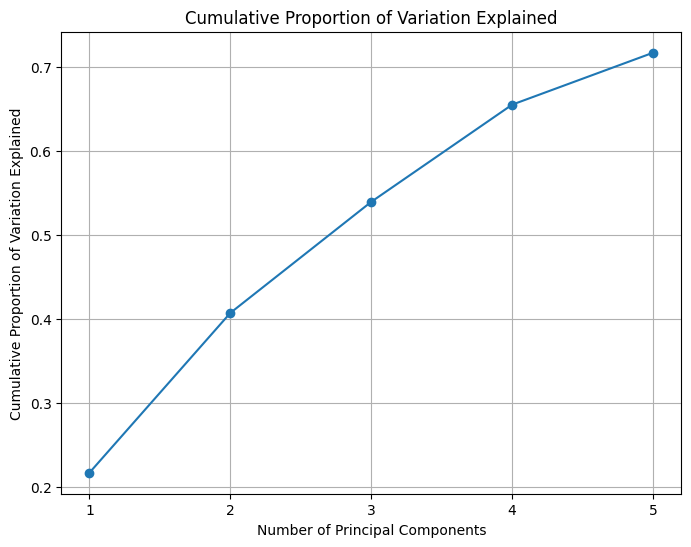

Loadings for Principal Components:
       Open    Volume    SENSEX       SPX   USD_INR   GBP_INR  NIFTY_BANK  \
0  0.087963 -0.091910 -0.305802 -0.115169 -0.174352 -0.038022   -0.296100   
1 -0.287922  0.287205 -0.186579 -0.077640 -0.106182 -0.118721   -0.179473   
2  0.225726 -0.224658  0.092814  0.033874  0.019181  0.158567    0.093203   
3 -0.218778  0.151593  0.329836  0.157410  0.172589 -0.227144    0.299156   
4 -0.408850  0.156753 -0.020963 -0.078702 -0.037269 -0.637931   -0.002570   

      NFYT1     NFYt2     NFYt3  ...     T-364      FBIL       TE1       TE2  \
0 -0.307834 -0.086515 -0.106089  ...  0.223673  0.220391  0.051733 -0.015416   
1 -0.188620 -0.031027 -0.046015  ... -0.397513 -0.369339  0.043597  0.104536   
2  0.094310 -0.026041 -0.015722  ... -0.081645  0.069283  0.545955  0.493528   
3  0.324048 -0.233196 -0.175791  ...  0.025167  0.001715 -0.032180 -0.070767   
4 -0.021859  0.222166  0.123235  ...  0.126395  0.213691  0.198192  0.126726   

        TE3  Returns 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_excel('dataM3.xlsx')

# Step 2: Data Preprocessing
# Drop columns that are not needed for PCA
df.drop(columns=['Close','Adj Close'], inplace=True)

# Handle missing values if any
df.dropna(inplace=True)

# Extract the date column and drop it from the dataframe
date_column = df['Date']
df.drop(columns=['Date'], inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Perform PCA with 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_scaled)

# Calculate the cumulative proportion of variation
cumulative_var_ratio = pca.explained_variance_ratio_.cumsum()

# Step 4: Create a new DataFrame with PCA components and date column
columns = ['Date', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']
data = pd.DataFrame(data=principal_components, columns=columns[1:])
data['Date'] = date_column

# Step 5: Save the new DataFrame to a new Excel file
data.to_excel('pca_result.xlsx', index=False)

# Plot the explained variance ratio (Scree Plot)
plt.figure(figsize=(8, 6))
plt.plot(range(1, pca.n_components_ + 1), cumulative_var_ratio, marker='o', linestyle='-')
plt.title('Cumulative Proportion of Variation Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variation Explained')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

# Step 6: Interpretation of Principal Components
# Get the loadings (coefficients) of each original feature for each principal component
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, columns=df.columns)

# Display the loadings for each principal component
print("Loadings for Principal Components:")
print(loadings_df)

# Identify the features with the highest absolute loadings for each principal component
top_features = []
for i in range(len(loadings)):
    top_feature_idx = loadings_df.iloc[i].abs().argsort()[-3:][::-1]  
    top_features.append(df.columns[top_feature_idx].values)
    print(f"Top features for PCA{i+1}: {top_features[i]}")


# PCA code for how much data will give how much variance

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_excel('modified_excel_file11.xlsx')

# Step 2: Data Preprocessing
# Drop columns that are not needed for PCA
df.drop(columns=['Adj Close'], inplace=True)

# Handle missing values if any
df.dropna(inplace=True)

# Extract the date column and drop it from the dataframe
date_column = df['Date']
df.drop(columns=['Date'], inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Perform PCA with 5 components
pca = PCA(n_components=12)
principal_components = pca.fit_transform(X_scaled)

# Step 4: Calculate cumulative variance ratio
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Display cumulative variance ratio
print("Cumulative Variance Ratio:")
for i, ratio in enumerate(cumulative_variance_ratio, 1):
    print(f"Principal Component {i}: {ratio:.4f}")


Cumulative Variance Ratio:
Principal Component 1: 0.2041
Principal Component 2: 0.3920
Principal Component 3: 0.5162
Principal Component 4: 0.6226
Principal Component 5: 0.6853
Principal Component 6: 0.7340
Principal Component 7: 0.7810
Principal Component 8: 0.8209
Principal Component 9: 0.8550
Principal Component 10: 0.8850
Principal Component 11: 0.9093
Principal Component 12: 0.9286


In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_excel('dataM2.xlsx')

# Step 2: Data Preprocessing
# Handle missing values if any
df.dropna(inplace=True)

# Extract the date column
date_column = df['Date']

# Calculate returns and drop the date column
df.drop(columns=['Date'], inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Perform PCA with 12 components
pca = PCA(n_components=12)
principal_components = pca.fit_transform(X_scaled)

# Step 4: Create a new DataFrame with PCA components, date column, and returns
columns = ['Date', 'Adj Close'] + [f'PCA{i+1}' for i in range(12)]
data = pd.DataFrame(data=principal_components, columns=[f'PCA{i+1}' for i in range(12)])
data['Date'] = date_column
data['Adj Close'] = df['Adj Close']
# data['Returns'] = returns

# Step 5: Save the new DataFrame to a new Excel file
data.to_excel('pca_result_12_components.xlsx', index=False)


In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_excel('dataM2.xlsx')

# Step 2: Data Preprocessing
# Handle missing values if any
df.dropna(inplace=True)

# Extract the date column
date_column = df['Date']

# Calculate returns and drop the date, adj close, and returns direction columns
df.drop(columns=['Date', 'Adj Close'], inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Perform PCA with 12 components
pca = PCA(n_components=12)
principal_components = pca.fit_transform(X_scaled)

# Step 4: Create a new DataFrame with PCA components and date column
columns = ['Date', 'Adj Close'] + [f'PCA{i+1}' for i in range(12)]
data = pd.DataFrame(data=principal_components, columns=[f'PCA{i+1}' for i in range(12)])
data['Date'] = date_column
data['Adj Close'] = df['Adj Close']
data['Returns direction'] = df['Returns direction']

# Step 5: Save the new DataFrame to a new Excel file
data.to_excel('pca_result_12_components_with_adj_close.xlsx', index=False)


           Open          High           Low         Close  Volume    SENSEX  \
0  10868.849609  10895.349609  10735.049805  10792.500000  309700 -0.010014   
1  10796.799805  10814.049805  10661.250000  10672.250000  286200 -0.010526   
2  10699.700195  10741.049805  10628.650391  10727.349609  296600  0.005108   
3  10804.849609  10835.950195  10750.150391  10771.799805  269400  0.004344   
4  10786.250000  10818.450195  10733.250000  10802.150391  301200  0.003648   

        SPX   USD_INR  GBP_INR  NIFTY_BANK  ...     NFYt3     NFYt4  T-91  \
0 -0.024757  0.000285   88.224    0.000534  ...  0.007431  0.004655  6.65   
1 -0.024757  0.000285   88.536   -0.007906  ...  0.000244  0.007431  6.65   
2  0.034336  0.005207   88.497    0.008722  ... -0.006491  0.000244  6.65   
3  0.007010  0.000825   89.166    0.004028  ... -0.011142 -0.006491  6.65   
4  0.009695 -0.007319   89.184    0.007506  ...  0.005163 -0.011142  6.65   

   T-182  T-364  FBIL   TE1   TE2   TE3  Returns direction  
0

KeyError: 'Adj Close'

In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_excel('dataM2.xlsx')

# Step 2: Data Preprocessing
# Handle missing values if any
df.dropna(inplace=True)

# Extract the 'Date' column
date_column = df['Date']

# Drop 'Date', 'Adj Close', and 'Returns direction' columns for PCA
df.drop(columns=['Date', 'Adj Close', 'Returns direction'], inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Perform PCA with 12 components
pca = PCA(n_components=12)
principal_components = pca.fit_transform(X_scaled)

# Step 4: Create a new DataFrame with PCA components
pca_columns = [f'PCA{i+1}' for i in range(12)]
data = pd.DataFrame(data=principal_components, columns=pca_columns)

# Step 5: Add back the 'Date', 'Adj Close', and 'Returns direction' columns
data['Date'] = date_column
data['Adj Close'] = df['Adj Close']
data['Returns direction'] = df['Returns direction']

# Step 6: Save the new DataFrame to a new Excel file
data.to_excel('pca_result_12_components_with_adj_close.xlsx', index=False)


KeyError: 'Adj Close'

In [19]:
print(df.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SENSEX', 'SPX', 'USD_INR',
       'GBP_INR', 'NIFTY_BANK', 'NFYT1', 'NFYt2', 'NFYt3', 'NFYt4', 'T-91',
       'T-182', 'T-364', 'FBIL', 'TE1', 'TE2', 'TE3', 'Returns direction'],
      dtype='object')


In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_excel('modified_excel_file.xlsx')

# Step 2: Data Preprocessing
# Handle missing values if any
df.dropna(inplace=True)

# Extract the 'Date' column
date_column = df['Date']

# Save 'Adj Close' and 'Returns direction' columns
adj_close_column = df['Adj Close']
returns_direction_column = df['Returns direction']

# Drop 'Date', 'Adj Close', and 'Returns direction' columns for PCA
df.drop(columns=['Date', 'Close','Adj Close', 'Returns direction'], inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Perform PCA with 12 components
pca = PCA(n_components=12)
principal_components = pca.fit_transform(X_scaled)

# Step 4: Create a new DataFrame with PCA components
pca_columns = [f'PCA{i+1}' for i in range(12)]
data = pd.DataFrame(data=principal_components, columns=pca_columns)

# Step 5: Add back the 'Date', 'Adj Close', and 'Returns direction' columns
data['Date'] = date_column
# data['Adj Close'] = adj_close_column
data['Returns direction'] = returns_direction_column

# Step 6: Save the new DataFrame to a new Excel file
data.to_excel('pca_new.xlsx', index=False)


In [ ]:
# this is the main code i used for pca

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_excel('modified_excel_file11.xlsx')

# Step 2: Data Preprocessing
# Handle missing values if any
df.dropna(inplace=True)

# Extract the 'Date' column
date_column = df['Date']

# Save 'Returns direction' column
returns_direction_column = df['Returns direction']

# Drop 'Date' and 'Returns direction' columns for PCA
df.drop(columns=['Date', 'Returns direction'], inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Perform PCA with 12 components
pca = PCA(n_components=12)
principal_components = pca.fit_transform(X_scaled)

# Step 4: Create a new DataFrame with PCA components
pca_columns = [f'PCA{i+1}' for i in range(12)]
data = pd.DataFrame(data=principal_components, columns=pca_columns)

# Step 5: Add back the 'Date' and 'Returns direction' columns
data['Date'] = date_column
data['Returns direction'] = returns_direction_column

# Step 6: Save the new DataFrame to a new Excel file
data.to_excel('pcanew1.xlsx', index=False)


PermissionError: [Errno 13] Permission denied: 'modified_excel_file11.xlsx'